<a href="https://colab.research.google.com/github/Nazneen-akram/coursera-rep/blob/main/laptop_pricing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

# 1. Import a data set from a CSV file
data = pd.read_csv(URL)

# 2. Generate the statistical description of all the features
description = data.describe(include='all')

description

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238,238.000000,238.000000
unique,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,Dell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN
freq,NaN,NaN,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160,NaN,NaN
mean,118.500000,118.500000,NaN,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,NaN,0.676471,0.323529
std,68.848868,68.848868,NaN,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,NaN,0.468809,0.468809
min,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,NaN,0.000000,0.000000
25%,59.250000,59.250000,NaN,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,NaN,0.000000,0.000000
50%,118.500000,118.500000,NaN,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,NaN,1.000000,0.000000
75%,177.750000,177.750000,NaN,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,NaN,1.000000,1.000000


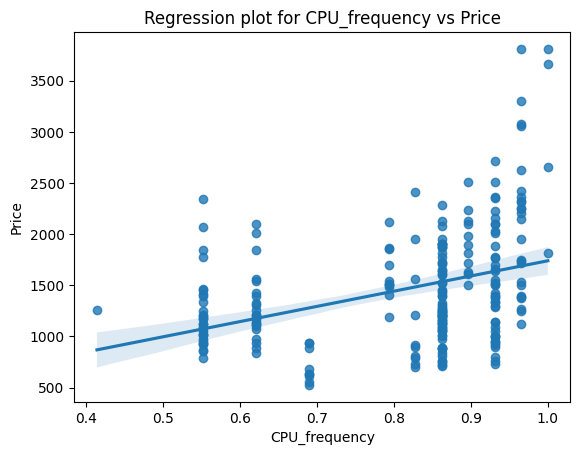

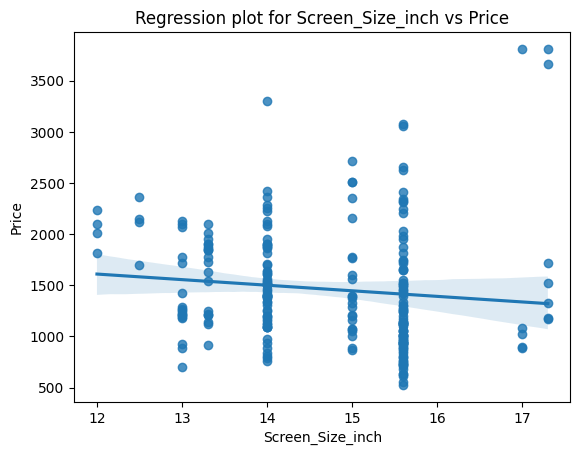

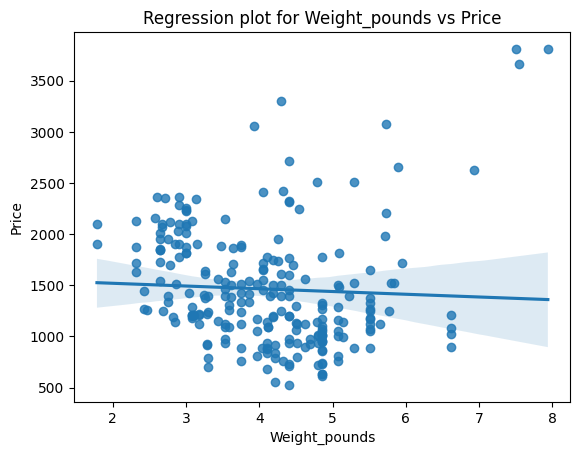

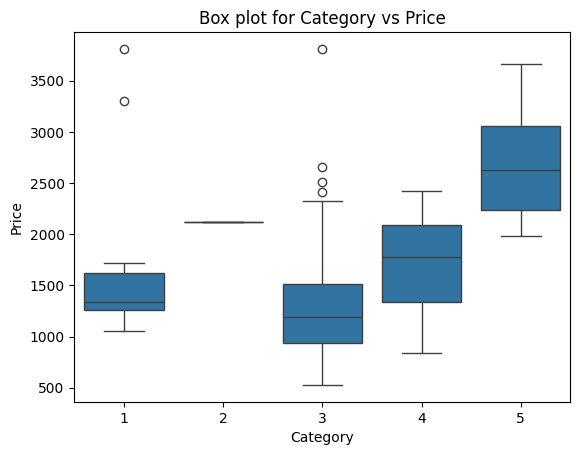

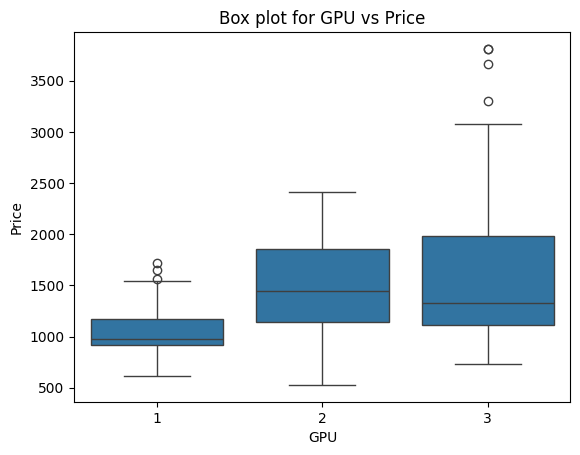

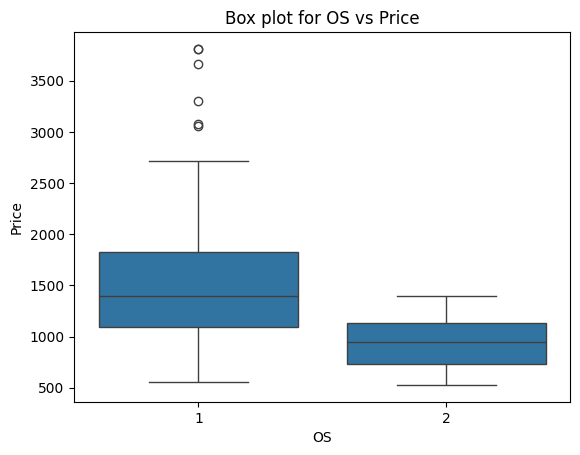

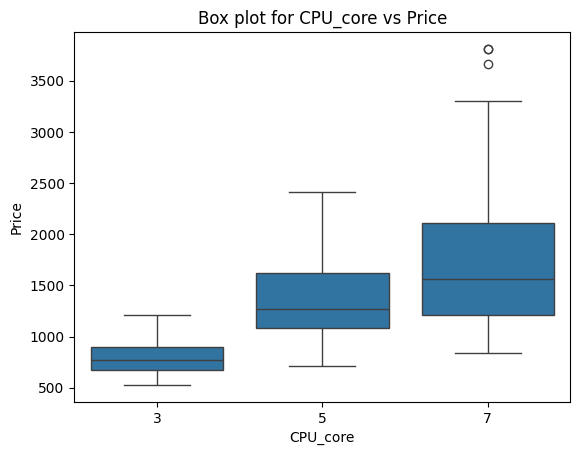

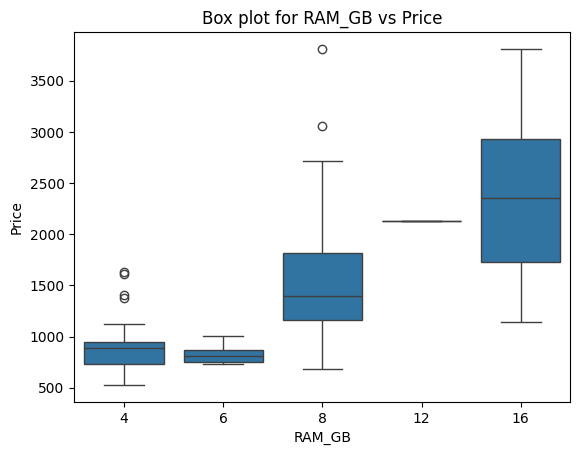

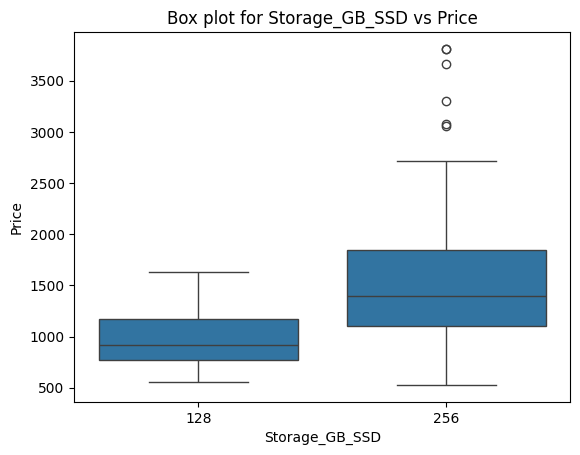

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


regression_attributes = ['CPU_frequency', 'Screen_Size_inch', 'Weight_pounds']
for attribute in regression_attributes:
    sns.regplot(x=attribute, y='Price', data=data)
    plt.title(f'Regression plot for {attribute} vs Price')
    plt.xlabel(attribute)
    plt.ylabel('Price')
    plt.show()

# 2. Create box plots
boxplot_attributes = ['Category', 'GPU', 'OS', 'CPU_core', 'RAM_GB', 'Storage_GB_SSD']
for attribute in boxplot_attributes:
    sns.boxplot(x=attribute, y='Price', data=data)
    plt.title(f'Box plot for {attribute} vs Price')
    plt.xlabel(attribute)
    plt.ylabel('Price')
    plt.show()

In [12]:
import numpy as np
from scipy.stats import pearsonr

# Create an empty dictionary to store the correlation results
correlation_results = {}

# Iterate over each attribute (except 'Price')
for attribute in data.columns:
    if attribute != 'Price':
        # Ensure that the attribute column is numeric
        if pd.api.types.is_numeric_dtype(data[attribute]) and pd.api.types.is_numeric_dtype(data['Price']):
            # Drop any missing values
            x = data[attribute].dropna()
            y = data['Price'].dropna()

            # The length of x and y must be the same after dropping missing values
            # Find the indices where both x and y are not missing
            common_indices = x.index.intersection(y.index)
            x = x.loc[common_indices]
            y = y.loc[common_indices]

            # Check if there are enough data points for correlation
            if len(x) > 1 and len(y) > 1:
                # Calculate the correlation coefficient and p-value
                correlation_coefficient, p_value = pearsonr(x, y)

                # Store the correlation coefficient and p-value in the dictionary
                correlation_results[attribute] = {'correlation_coefficient': correlation_coefficient, 'p_value': p_value}

# Print the correlation results
for attribute, results in correlation_results.items():
    print(f'Attribute: {attribute}')
    print(f'Correlation Coefficient: {results["correlation_coefficient"]}')
    print(f'p-value: {results["p_value"]}')
    print('---')


Attribute: Unnamed: 0.1
Correlation Coefficient: 0.32193291314757
p-value: 3.851058463945787e-07
---
Attribute: Unnamed: 0
Correlation Coefficient: 0.32193291314757
p-value: 3.851058463945787e-07
---
Attribute: Category
Correlation Coefficient: 0.28624275581264125
p-value: 7.225696235806733e-06
---
Attribute: GPU
Correlation Coefficient: 0.2882981988881428
p-value: 6.166949698364282e-06
---
Attribute: OS
Correlation Coefficient: -0.22172980114827384
p-value: 0.0005696642559246749
---
Attribute: CPU_core
Correlation Coefficient: 0.4593977773355115
p-value: 7.912950127009034e-14
---
Attribute: Screen_Size_inch
Correlation Coefficient: -0.11064420817118266
p-value: 0.08853397846830766
---
Attribute: CPU_frequency
Correlation Coefficient: 0.36666555892588604
p-value: 5.5024633507134225e-09
---
Attribute: RAM_GB
Correlation Coefficient: 0.5492972971857844
p-value: 3.681560628842868e-20
---
Attribute: Storage_GB_SSD
Correlation Coefficient: 0.2434207552181029
p-value: 0.00014898923191724174


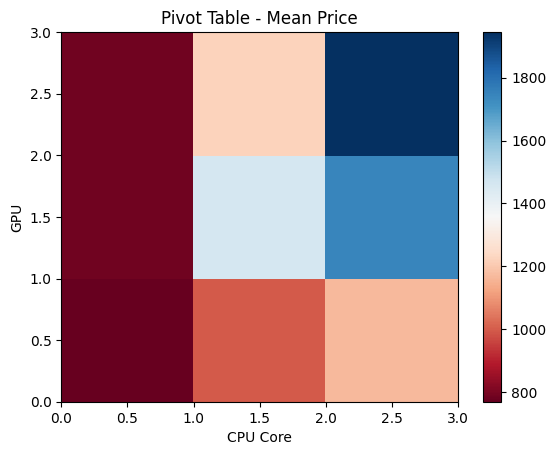

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Group the attributes
grouped_data = data.groupby(['GPU', 'CPU_core'])['Price'].mean()

# 2. Create a pivot table
pivot_table = pd.pivot_table(data, values='Price', index='GPU', columns='CPU_core', aggfunc='mean')

# 3. Plot a pcolor plot
plt.pcolor(pivot_table, cmap='RdBu')
plt.colorbar()
plt.title('Pivot Table - Mean Price')
plt.xlabel('CPU Core')
plt.ylabel('GPU')
plt.show()